# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [63]:
import requests
import random
from pprint import pprint
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from api_keys import weather_api_key
from citipy import citipy
import scipy.stats as st
from scipy.stats import linregress


## Generate Cities List

In [16]:
#Setting up initial lists for pull + # of requests
city_list = []
pullsize = 600

# Generating random Lat/Long coordinates to populate cities into list
for x in range(0,pullsize):
    coord1 = np.random.uniform(low=-90.000000, high=90.000000)
    coord2 = np.random.uniform(low=-180.000000, high=180.000000)
    city = citipy.nearest_city(coord1, coord2)
    city_list.append(city.city_name)  

In [17]:
# Setting up initial DataFrame
Collected_df = pd.DataFrame(columns = ["City","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed","Country","Date"])
Collected_df 

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [8]:
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = url + "appid=" + weather_api_key + "&q=" + str(city_list)
print(query_url)

http://api.openweathermap.org/data/2.5/weather?appid=aeeb429dbf3f1c343f14b93e23071eae&q=['pisco', 'chuy', 'new norfolk', 'puerto ayora', 'taolanaro']


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [18]:
url = "http://api.openweathermap.org/data/2.5/weather?"
#counter to work with results call
counter = 0

# iterating within generated list, pulling from WeatherAPI
for city_list in city_list:
    try:
        #query_url = url + "appid=" + weather_api_key + "&q=" + str(city_list)
        query_url = url + "appid=" + weather_api_key + "&q=" + str(city_list)
        #query_url = url + "appid=" + weather_api_key + "&q=" + str(city)
        pulloutput = requests.get(query_url).json()
        newrow = {"City": pulloutput["name"],
                 "Lat": pulloutput["coord"]["lat"],
                 "Lng": pulloutput["coord"]["lon"],
                 "Max Temp": pulloutput["main"]["temp_max"],
                 "Humidity": pulloutput["main"]["humidity"],
                 "Cloudiness": pulloutput['clouds']['all'],
                 "Wind Speed": pulloutput['wind']['speed'],
                 "Country": pulloutput["sys"]["country"],
                 "Date": str(pulloutput["dt"]),
                 }
        Collected_df = Collected_df.append(newrow, ignore_index=True)
        counter += 1
        #outputing results
        print(f"Processing Record {counter} of Set 1 | {city_list}")
    except KeyError:
        print(f"City not found. Skipping...")
print(f"-----------------------------")
print(f"Data Retrieval Complete")
print(f"-----------------------------")


Processing Record 1 of Set 1 | healdsburg
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | atuona
Processing Record 5 of Set 1 | mataura
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | new norfolk
Processing Record 8 of Set 1 | punta arenas
Processing Record 9 of Set 1 | coihaique
Processing Record 10 of Set 1 | grand island
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | mar del plata
Processing Record 13 of Set 1 | virginia beach
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | milledgeville
Processing Record 16 of Set 1 | namibe
Processing Record 17 of Set 1 | busselton
Processing Record 18 of Set 1 | grants pass
Processing Record 19 of Set 1 | tasiilaq
Processing Record 20 of Set 1 | albany
Processing Record 21 of Set 1 | bethel
Processing Record 22 of Set 1 | yellowknife
Processing Record 23 of Set 1 | dikson
Processing Record 24 of Set 1 | arr

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [38]:
Collected_df = Collected_df.drop_duplicates()
Collected_df.to_csv(r'exports\CityList.csv')
Collected_df.head(15)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Healdsburg,38.61,-122.87,287.04,100,90,1.24,US,1600165074
1,Rikitea,-23.12,-134.97,296.02,84,75,4.57,PF,1600165074
2,Punta Arenas,-53.15,-70.92,275.15,87,42,9.30,CL,1600165074
3,Atuona,-9.80,-139.03,298.82,73,1,8.21,PF,1600165074
4,Mataura,-46.19,168.86,279.26,82,37,4.47,NZ,1600165075
5,Ushuaia,-54.80,-68.30,274.15,86,75,12.90,AR,1600165075
6,New Norfolk,-42.78,147.06,285.93,61,94,3.13,AU,1600164637
8,Coyhaique,-45.58,-72.07,280.15,48,53,3.10,CL,1600165076
9,Grand Island,40.92,-98.34,289.15,82,1,4.60,US,1600164990
11,Mar del Plata,-38.00,-57.56,279.26,80,0,1.50,AR,1600164888


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,5.990000e+02
mean,19.877028,19.568998,69.794808,69.353923,51.569282,7.979416,1.593605e+09
std,33.262944,91.418472,15.678452,22.704698,35.405602,5.660694,5.738815e+01
min,-54.800000,-179.170000,12.200000,7.000000,0.000000,0.360000,1.593605e+09
25%,-8.540000,-61.210000,59.000000,55.000000,20.000000,3.620000,1.593605e+09
50%,24.370000,24.670000,73.110000,75.000000,59.000000,6.730000,1.593605e+09
75%,46.585000,102.255000,80.600000,87.000000,85.000000,11.050000,1.593605e+09
max,78.220000,179.320000,116.600000,100.000000,100.000000,42.500000,1.593605e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [48]:
Collected_df2 =Collected_df[Collected_df["Humidity"] <= 100]

(287, 9)

In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

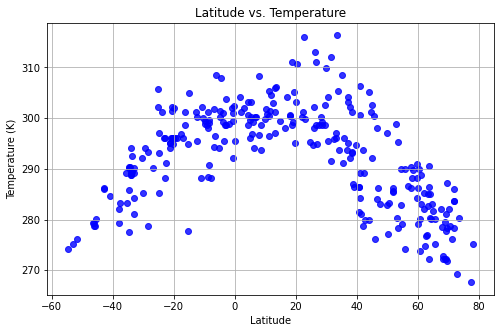

In [57]:
plt.figure(figsize=(8,5))
plt.scatter(x=(Collected_df2["Lat"]), y=(Collected_df2["Max Temp"]), marker="o", facecolors="blue", alpha=0.8)
plt.title('Latitude vs. Temperature')
plt.ylabel('Temperature (K)')
plt.xlabel("Latitude")
plt.grid()

## Latitude vs. Humidity Plot

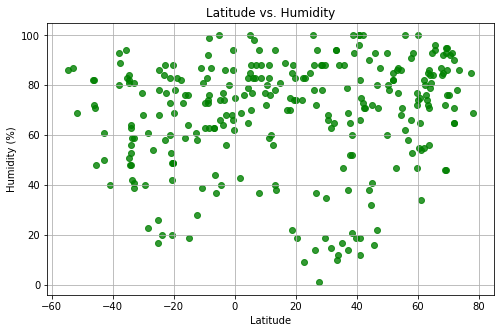

In [58]:
plt.figure(figsize=(8,5))
plt.scatter(x=(Collected_df2["Lat"]), y=(Collected_df2["Humidity"]), marker="o", facecolors="green", alpha=0.8)
plt.title('Latitude vs. Humidity')
plt.ylabel('Humidity (%)')
plt.xlabel("Latitude")
plt.grid()

## Latitude vs. Cloudiness Plot

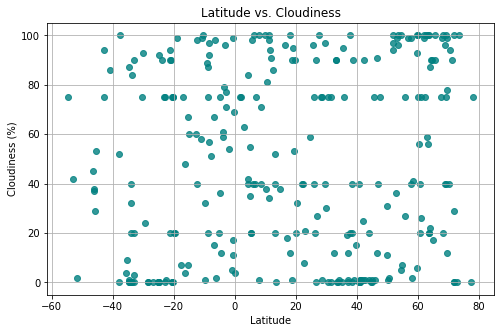

In [60]:
plt.figure(figsize=(8,5))
plt.scatter(x=(Collected_df2["Lat"]), y=(Collected_df2["Cloudiness"]), marker="o", facecolors="teal", alpha=0.8)
plt.title('Latitude vs. Cloudiness')
plt.ylabel('Cloudiness (%)')
plt.xlabel("Latitude")
plt.grid()

## Latitude vs. Wind Speed Plot

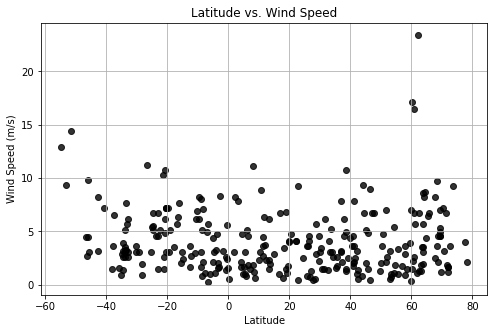

In [62]:
plt.figure(figsize=(8,5))
plt.scatter(x=(Collected_df2["Lat"]), y=(Collected_df2["Wind Speed"]), marker="o", facecolors="black", alpha=0.8)
plt.title('Latitude vs. Wind Speed')
plt.ylabel('Wind Speed (m/s)')
plt.xlabel("Latitude")
plt.grid()

## Linear Regression

In [66]:
# Splitting the dataset into North and Southern hemispheres for analysis
NorthHem_df=Collected_df2[Collected_df2["Lat"]>=0]
SouthHem_df=Collected_df2[Collected_df2["Lat"]<0]
# SouthHem_df




,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Rikitea,-23.12,-134.97,296.02,84,75,4.57,PF,1600165074
2,Punta Arenas,-53.15,-70.92,275.15,87,42,9.30,CL,1600165074
3,Atuona,-9.80,-139.03,298.82,73,1,8.21,PF,1600165074
4,Mataura,-46.19,168.86,279.26,82,37,4.47,NZ,1600165075
5,Ushuaia,-54.80,-68.30,274.15,86,75,12.90,AR,1600165075
...,...,...,...,...,...,...,...,...,...
515,Angoche,-16.23,39.91,301.30,59,48,7.69,MZ,1600165173
521,Kiama,-34.68,150.87,290.37,84,0,3.13,AU,1600165175
529,Carnarvon,-24.87,113.63,297.15,78,0,6.70,AU,1600165176
543,Cururupu,-1.83,-44.87,298.89,80,54,3.14,BR,1600165015


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

correlation coefficient is -0.78


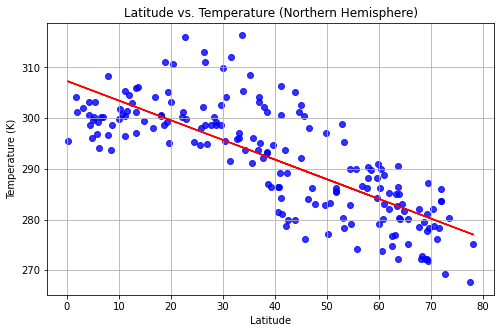

In [96]:
correlation = st.pearsonr((NorthHem_df["Lat"]),(NorthHem_df["Max Temp"]))
print(f"correlation coefficient is {round(correlation[0],2)}")

slope, intercept, rvalue, pvalue, stderr = linregress((NorthHem_df["Lat"]),(NorthHem_df["Max Temp"]))
regression_values = (NorthHem_df["Lat"]) * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(8,5))
plt.scatter(x=(NorthHem_df["Lat"]), y=(NorthHem_df["Max Temp"]), marker="o", facecolors="blue", alpha=0.8)
plt.plot((NorthHem_df["Lat"]), regression_values, "red")
#plt.annotate(line_eq, fontsize=15, color="red")
plt.title('Latitude vs. Temperature (Northern Hemisphere)')
plt.ylabel('Temperature (K)')
plt.xlabel("Latitude")
plt.grid()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

correlation coefficient is 0.77


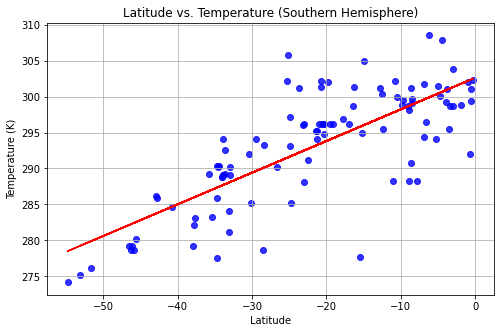

In [80]:
correlation = st.pearsonr((SouthHem_df["Lat"]),(SouthHem_df["Max Temp"]))
print(f"correlation coefficient is {round(correlation[0],2)}")

slope, intercept, rvalue, pvalue, stderr = linregress((SouthHem_df["Lat"]),(SouthHem_df["Max Temp"]))
regression_values = (SouthHem_df["Lat"]) * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(8,5))
plt.scatter(x=(SouthHem_df["Lat"]), y=(SouthHem_df["Max Temp"]), marker="o", facecolors="blue", alpha=0.8)
plt.plot((SouthHem_df["Lat"]), regression_values, "red")
#plt.annotate(line_eq, fontsize=15, color="red")
plt.title('Latitude vs. Temperature (Southern Hemisphere)')
plt.ylabel('Temperature (K)')
plt.xlabel("Latitude")
plt.grid()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

correlation coefficient is 0.09


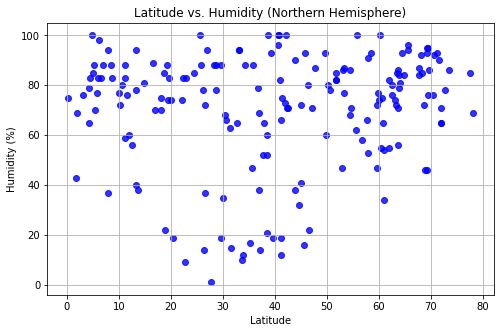

In [89]:
correlation = st.pearsonr((NorthHem_df["Lat"]),(NorthHem_df["Humidity"]))
print(f"correlation coefficient is {round(correlation[0],2)}")

#slope, intercept = linregress((NorthHem_df["Lat"]),(NorthHem_df["Humidity"]))
#regression_values = (NorthHem_df["Lat"]) * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(8,5))
plt.scatter(x=(NorthHem_df["Lat"]), y=(NorthHem_df["Humidity"]), marker="o", facecolors="blue", alpha=0.8)
#plt.plot((NorthHem_df["Lat"]), regression_values, "red")
#plt.annotate(line_eq, fontsize=15, color="red")
plt.title('Latitude vs. Humidity (Northern Hemisphere)')
plt.ylabel('Humidity (%)')
plt.xlabel("Latitude")
plt.grid()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

correlation coefficient is 0.05


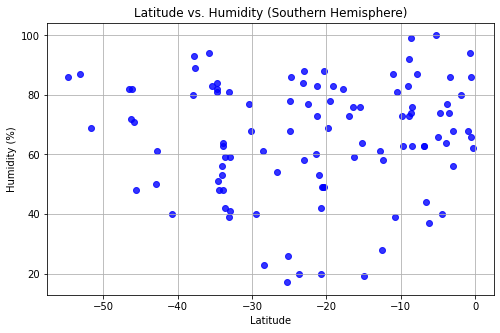

In [98]:
correlation = st.pearsonr((SouthHem_df["Lat"]),(SouthHem_df["Humidity"]))
print(f"correlation coefficient is {round(correlation[0],2)}")

#slope, intercept, r_value, p_value, std_err = linregress((SouthHem_df["Lat"]),(SouthHem_df["Humidity"])) 
#regression_values = (SouthHem_df["Lat"]) * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(8,5))
plt.scatter(x=(SouthHem_df["Lat"]), y=(SouthHem_df["Humidity"]), marker="o", facecolors="blue", alpha=0.8)
#plt.plot((SouthHem_df["Lat"]), regression_values, "red")
#plt.annotate(line_eq, fontsize=15, color="red")
plt.title('Latitude vs. Humidity (Southern Hemisphere)')
plt.ylabel('Humidity (%)')
plt.xlabel("Latitude")
plt.grid()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

correlation coefficient is 0.07


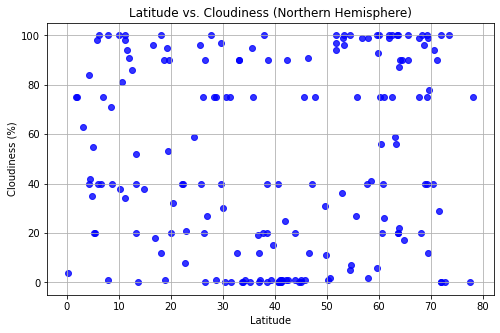

In [102]:
correlation = st.pearsonr((NorthHem_df["Lat"]),(NorthHem_df["Cloudiness"]))
print(f"correlation coefficient is {round(correlation[0],2)}")


#slope, intercept, rvalue, pvalue, stderr = linregress((NorthHem_df["Lat"]),(NorthHem_df["Cloudiness"]))
#regression_values = (NorthHem_df["Lat"]) * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(8,5))
plt.scatter(x=(NorthHem_df["Lat"]), y=(NorthHem_df["Cloudiness"]), marker="o", facecolors="blue", alpha=0.8)
#plt.plot((NorthHem_df["Lat"]), regression_values, "red")
#plt.annotate(line_eq, fontsize=15, color="red")
plt.title('Latitude vs. Cloudiness (Northern Hemisphere)')
plt.ylabel('Cloudiness (%)')
plt.xlabel("Latitude")
plt.grid()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

correlation coefficient is 0.19


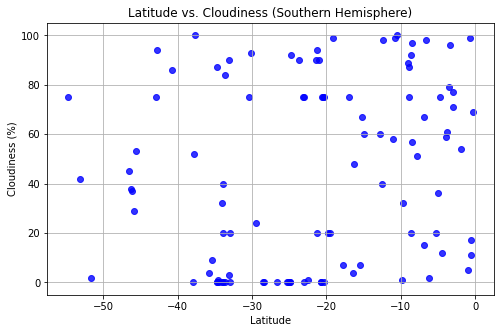

In [110]:
correlation = st.pearsonr((SouthHem_df["Lat"]),(SouthHem_df["Cloudiness"]))
print(f"correlation coefficient is {round(correlation[0],2)}")


#slope, intercept, rvalue, pvalue, stderr = linregress((SouthHem_df["Lat"]),(SouthHem_df["Cloudiness"]))
#regression_values = (SouthHem_df["Lat"]) * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(8,5))
plt.scatter(x=(SouthHem_df["Lat"]), y=(SouthHem_df["Cloudiness"]), marker="o", facecolors="blue", alpha=0.8)
#plt.plot((SouthHem_df["Lat"]), regression_values, "red")
#plt.annotate(line_eq, fontsize=15, color="red")
plt.title('Latitude vs. Cloudiness (Southern Hemisphere)')
plt.ylabel('Cloudiness (%)')
plt.xlabel("Latitude")
plt.grid()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

correlation coefficient is 0.17


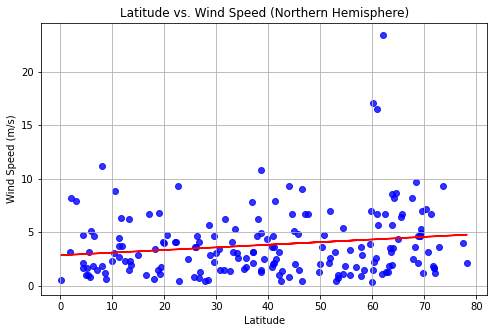

In [113]:
correlation = st.pearsonr((NorthHem_df["Lat"]),(NorthHem_df["Wind Speed"]))
print(f"correlation coefficient is {round(correlation[0],2)}")


slope, intercept, rvalue, pvalue, stderr = linregress((NorthHem_df["Lat"]),(NorthHem_df["Wind Speed"]))
regression_values = (NorthHem_df["Lat"]) * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(8,5))
plt.scatter(x=(NorthHem_df["Lat"]), y=(NorthHem_df["Wind Speed"]), marker="o", facecolors="blue", alpha=0.8)
plt.plot((NorthHem_df["Lat"]), regression_values, "red")
#plt.annotate(line_eq, fontsize=15, color="red")
plt.title('Latitude vs. Wind Speed (Northern Hemisphere)')
plt.ylabel('Wind Speed (m/s)')
plt.xlabel("Latitude")
plt.grid()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

correlation coefficient is -0.29


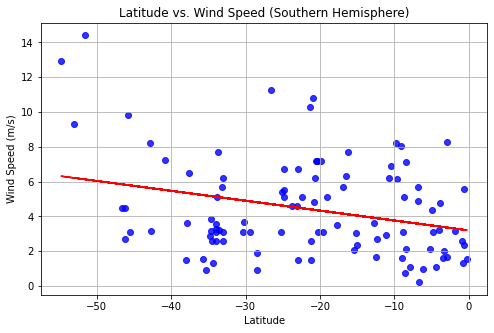

In [114]:
correlation = st.pearsonr((SouthHem_df["Lat"]),(SouthHem_df["Wind Speed"]))
print(f"correlation coefficient is {round(correlation[0],2)}")


slope, intercept, rvalue, pvalue, stderr = linregress((SouthHem_df["Lat"]),(SouthHem_df["Wind Speed"]))
regression_values = (SouthHem_df["Lat"]) * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(8,5))
plt.scatter(x=(SouthHem_df["Lat"]), y=(SouthHem_df["Wind Speed"]), marker="o", facecolors="blue", alpha=0.8)
plt.plot((SouthHem_df["Lat"]), regression_values, "red")
#plt.annotate(line_eq, fontsize=15, color="red")
plt.title('Latitude vs. Wind Speed (Southern Hemisphere)')
plt.ylabel('Wind Speed (m/s)')
plt.xlabel("Latitude")
plt.grid()